In [7]:
from collections import Counter
from typing import Dict

import matplotlib
import matplotlib.pyplot as plt

font = {"family": "AppleGothic"}
matplotlib.rc("font", **font)

%matplotlib inline

In [8]:

class Loader:
    def __init__(self, filename: str):
        self._filename = filename
    
    def __iter__(self) -> Dict[str, str]:
        with open(self._filename, 'rt') as f:
            sentences = []
            for line in f:
                if line.startswith('EOS'):
                    break
                items = line.split('\t')
                ma = items[1].split(',')
                sentence = {
                    'surface': items[0],
                    'base': ma[6],
                    'pos': ma[0],
                    'pos1': ma[1]
                }
                sentences.append(sentence)
                if items[0] == '。':
                    yield sentences
                    sentences = []

            if sentences != []:
                yield sentences

In [9]:

loader = Loader('neko.txt.mecab')

In [10]:

words = []
for sentences in loader:
    for sentence in sentences:
        words.append(sentence['surface'])
counter = Counter(words)

In [11]:
x = []
y = []
for result in counter.most_common()[:10]:
    x.append(result[0])
    y.append(result[1])

<BarContainer object of 10 artists>

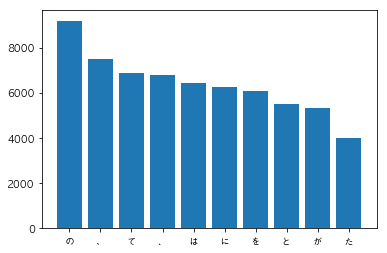

In [12]:
plt.bar(x, y)